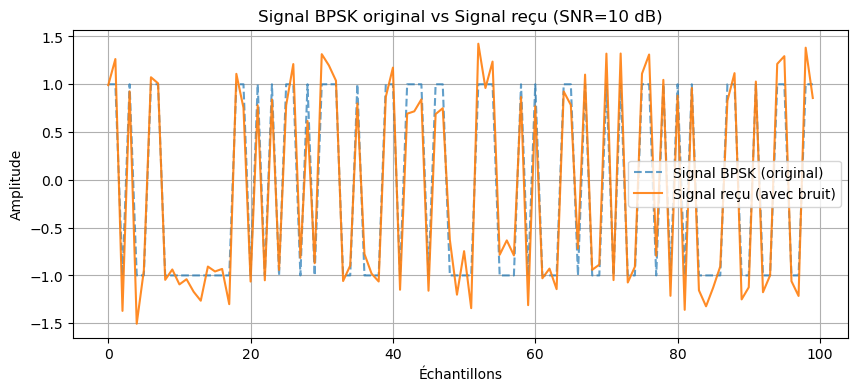

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_gaussian_channel(SNR_dB, num_samples=1000):
    # Génération du signal BPSK (±1)
    bits = np.random.randint(0, 2, num_samples)  # Génération de bits 0 et 1
    signal = 2 * bits - 1  # Modulation BPSK : 0 -> -1, 1 -> +1
    
    # Calcul du bruit Gaussien
    SNR_linear = 10**(SNR_dB / 10)  # Convertir SNR de dB en échelle linéaire
    noise_std = np.sqrt(1 / (2 * SNR_linear))  # Écart-type du bruit
    noise = noise_std * np.random.randn(num_samples)  # Bruit Gaussien blanc

    # Signal reçu après ajout du bruit
    received_signal = signal + noise

    return signal, received_signal

# Simulation avec un SNR de 10 dB
SNR_dB = 10
num_samples = 1000
signal, received_signal = simulate_gaussian_channel(SNR_dB, num_samples)

# Tracé des signaux
plt.figure(figsize=(10, 4))
plt.plot(signal[:100], label="Signal BPSK (original)", linestyle='dashed', alpha=0.7)
plt.plot(received_signal[:100], label="Signal reçu (avec bruit)", alpha=0.9)
plt.xlabel("Échantillons")
plt.ylabel("Amplitude")
plt.title(f"Signal BPSK original vs Signal reçu (SNR={SNR_dB} dB)")
plt.legend()
plt.grid()
plt.show()


In [3]:
from scipy.signal import butter, lfilter

def lowpass_filter(signal, order=5, cutoff_freq=0.1):
    b, a = butter(order, cutoff_freq, btype='low', analog=False)  # Filtre passe-bas
    filtered_signal = lfilter(b, a, signal)  # Application du filtre
    return filtered_signal


In [5]:
def plot_time_domain(signal_noisy, signal_filtered):
    plt.figure(figsize=(10, 4))
    plt.plot(signal_noisy, label="Signal bruité", linestyle="dotted")
    plt.plot(signal_filtered, label="Signal filtré", linewidth=2)
    plt.xlabel("Échantillons")
    plt.ylabel("Amplitude")
    plt.title("Signal bruité vs Signal filtré")
    plt.legend()
    plt.grid()
    plt.show()


In [6]:
def plot_frequency_domain(signal_noisy, signal_filtered, fs=1):
    N = len(signal_noisy)
    freq = np.fft.fftfreq(N, d=1/fs)  # Axe des fréquences
    spectrum_noisy = np.abs(np.fft.fft(signal_noisy))
    spectrum_filtered = np.abs(np.fft.fft(signal_filtered))

    plt.figure(figsize=(10, 4))
    plt.plot(freq[:N//2], spectrum_noisy[:N//2], label="Spectre signal bruité")
    plt.plot(freq[:N//2], spectrum_filtered[:N//2], label="Spectre signal filtré", linewidth=2)
    plt.xlabel("Fréquence (Hz)")
    plt.ylabel("Amplitude")
    plt.title("Spectre du signal bruité et filtré")
    plt.legend()
    plt.grid()
    plt.show()


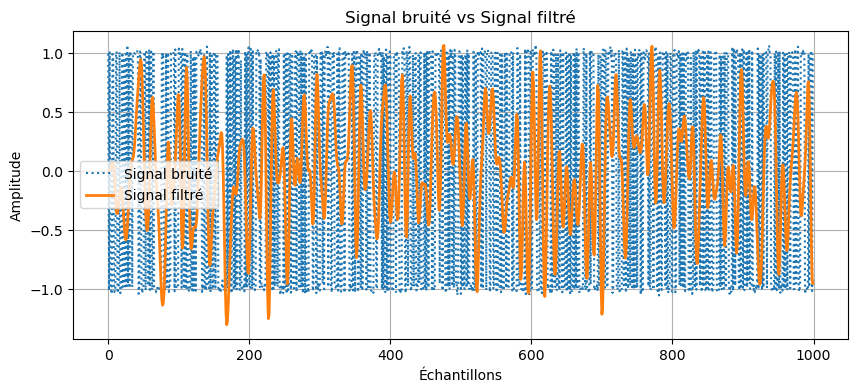

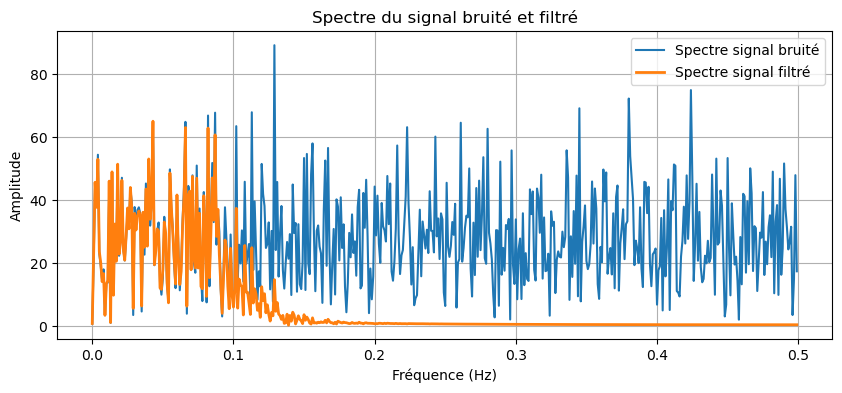

In [20]:
# Paramètres
SNR_dB = 30  # Rapport signal/bruit en dB
order = 7    # Ordre du filtre
cutoff_freq = 0.2 # Fréquence de coupure normalisée

# Simulation du canal
_, received_signal = simulate_gaussian_channel(SNR_dB)

# Application du filtre passe-bas
filtered_signal = lowpass_filter(received_signal, order, cutoff_freq)

# Affichage temporel
plot_time_domain(received_signal, filtered_signal)

# Affichage fréquentiel
plot_frequency_domain(received_signal, filtered_signal)
